# Numpy, Pandas, Matplotlib, Seaborn

# Modules, packages and libraries

## Math module

In [213]:
# Without math:
pv = 100
f = 1.03
n = 2

fv = pv * f ** n
fv

106.08999999999999

In [214]:
# With math:
import math

fv = pv * math.pow(f, n)
fv

106.08999999999999

In [215]:
import math

math.sqrt(fv / pv) - 1

0.030000000000000027

In [216]:
# Or nicer (feels more functional):
from math import sqrt

sqrt(fv / pv) - 1

0.030000000000000027

## Numpy package

In [217]:
import numpy as np

np.sqrt(fv / pv)

1.03

In [218]:
pv * np.power(f, n)

106.08999999999999

# Numpy arrays (Numerical Python)

In [219]:
import numpy as np

cfs = [50, 100, 120, 150, 200, 300]
cfs

[50, 100, 120, 150, 200, 300]

In [220]:
type(cfs)

list

In [221]:
# Convert to numpy array
cfs_a = np.array(cfs)
cfs_a

array([ 50, 100, 120, 150, 200, 300])

In [222]:
type(cfs_a)

numpy.ndarray

In [223]:
# In-place changing of list elements is not nice and goes against FP.
# But with numpy arrays we can change and get a new copy at the same time i.e. not actually change the original.
cfs_a - 20

array([ 30,  80, 100, 130, 180, 280])

In [224]:
cfs

[50, 100, 120, 150, 200, 300]

In [225]:
cfs_a * 1.1

array([ 55., 110., 132., 165., 220., 330.])

In [226]:
cfs_a2 = np.array([10, 20, -10,30, 10, -5])

In [227]:
cfs_a + cfs_a2

array([ 60, 120, 110, 180, 210, 295])

In [228]:
# What are the types of the elements in our numpy array? Numpy arrays are homogeneous and only accept 1 data type i.e. no mixing.
cfs_a2.dtype

dtype('int64')

## Vectorized operations with Numpy

In [229]:
import numpy as np

cfs = np.array([50, 100, 120, 150, 200, 300])

In [230]:
cfs * 1.1 # Where we don't change the original array

array([ 55., 110., 132., 165., 220., 330.])

In [231]:
cfs + np.array([10, 20, 5, -10, 20, 10])

array([ 60, 120, 125, 140, 220, 310])

XYZ company evaluates to buy an additional machine that will increase future profits/cashflows by:
- &#36;20 in t1
- &#36;50 in t2
- &#36;70 in t3
- &#36;100 in t4
- &#36;50 in t5
The machine costs &#36;200.
Calculate the project's NPV evaluating whether to persue the project - XYZ's required rate of return (cost of capital) is 6% p.a

In [232]:
cfs = np.array([-200, 20, 50, 70, 100, 50])
r = 0.06
f = 1 + r

In [233]:
n = np.array([0, 1, 2, 3, 4, 5]) # Discounting periods

In [234]:
cfs / f ** n # This gives the present values of all the cash flows

array([-200.        ,   18.86792453,   44.499822  ,   58.77334981,
         79.20936632,   37.36290864])

In [235]:
npv = (cfs / f ** n).sum()
npv

38.71337130837991

## View vs copy - Pitfalls when slicing Numpy arrays

In [236]:
import numpy as np

cfs = np.array([100, 10, 20, 50, 30, 25])

In [237]:
last3 = cfs[-3 :] # Sneakily creates a view (and not a new copy)
last3

array([50, 30, 25])

In [238]:
last3[0] = 55

In [239]:
last3

array([55, 30, 25])

In [240]:
cfs # WHOOPS! We've accidentally changed it.

array([100,  10,  20,  55,  30,  25])

In [241]:
# use copy()
last3 = cfs[-3 :].copy()
last3

array([55, 30, 25])

In [242]:
last3[0] = 1000

In [243]:
last3

array([1000,   30,   25])

In [244]:
cfs

array([100,  10,  20,  55,  30,  25])

Some handy numpy methods for array:

In [245]:
import numpy as np

cfs = np.array([-200, 20, 50, 70, 100, 50])

In [246]:
# Cumulative sum (with this we will see the breakeven year, in this case year 4):
cumalative = cfs.cumsum()
cumalative

array([-200, -180, -130,  -60,   40,   90])

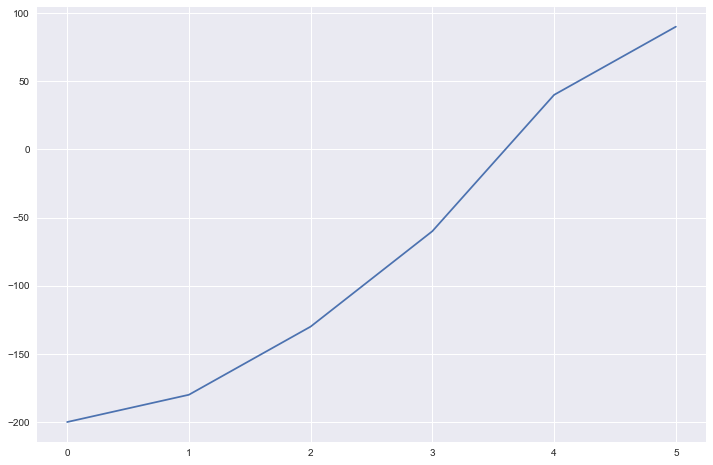

In [247]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(cumalative)
plt.show()

## Boolean arrays and conditional filtering

In [248]:
import numpy as np

In [249]:
cfs = np.array([-200, 20, 50, 70, 100, 50])
cfs

array([-200,   20,   50,   70,  100,   50])

In [250]:
cfs < 0

array([ True, False, False, False, False, False])

In [251]:
cfs[cfs < 0]

array([-200])

In [252]:
cfs[cfs > 0]

array([ 20,  50,  70, 100,  50])

## Advanced filtering and bitwise operators

In [253]:
import numpy as np

In [254]:
cfs = np.array([-200, 20, 50, 70, 100, 50])

In [255]:
mask1 = cfs < 0
mask1

array([ True, False, False, False, False, False])

In [256]:
mask2 = np.abs(cfs) > 60
mask2

array([ True, False, False,  True,  True, False])

In [257]:
mask1 | mask2

array([ True, False, False,  True,  True, False])

In [258]:
cfs[mask1 | mask2]

array([-200,   70,  100])

In [259]:
~(mask1 | mask2)

array([False,  True,  True, False, False,  True])

In [260]:
cfs[~(mask1 | mask2)]

array([20, 50, 50])

In [261]:
mask3 = cfs >= 0
mask4 = cfs < 30

In [262]:
cfs[mask3 & mask4]

array([20])

## Determining a project's payback period with np.where()

The XYZ company evaluates to buy additional machine that will increase profits/cashflows by:
- &#36;20 in t1
- &#36;50 in t2
- &#36;70 in t3
- &#36;100 in t4
- &#36;50 in t5

The machine costs &#36;200 (investment) - Calculate the `payback period` (time until initial investment is recovered).

In [263]:
import numpy as np

In [264]:
cfs = np.array([-200, 20, 50, 70, 100, 50])
cfs

array([-200,   20,   50,   70,  100,   50])

In [265]:
cfs.cumsum()

array([-200, -180, -130,  -60,   40,   90])

In [266]:
cfs.cumsum() > 0

array([False, False, False, False,  True,  True])

In [267]:
np.where(cfs.cumsum() > 0)

(array([4, 5]),)

In [268]:
np.concatenate(np.where(cfs.cumsum() > 0))

array([4, 5])

In [269]:
paybackPeriod, *rest = np.concatenate(np.where(cfs.cumsum() > 0))
paybackPeriod

4

In [270]:
# Or
np.nonzero(cfs.cumsum() > 0)[0][0]

4

In [271]:
# Another flatten
import more_itertools

list(more_itertools.flatten(np.where(cfs.cumsum() > 0)))

[4, 5]

## Creating Numpy arrays from scratch

In [272]:
import numpy as np

In [273]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [274]:
np.arange(5, 11, 0.5)

array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
       10.5])

In [275]:
# 10 evenly spaced (interest rate) numbers:
np.linspace(0.01, 0.15, num = 10)

array([0.01      , 0.02555556, 0.04111111, 0.05666667, 0.07222222,
       0.08777778, 0.10333333, 0.11888889, 0.13444444, 0.15      ])

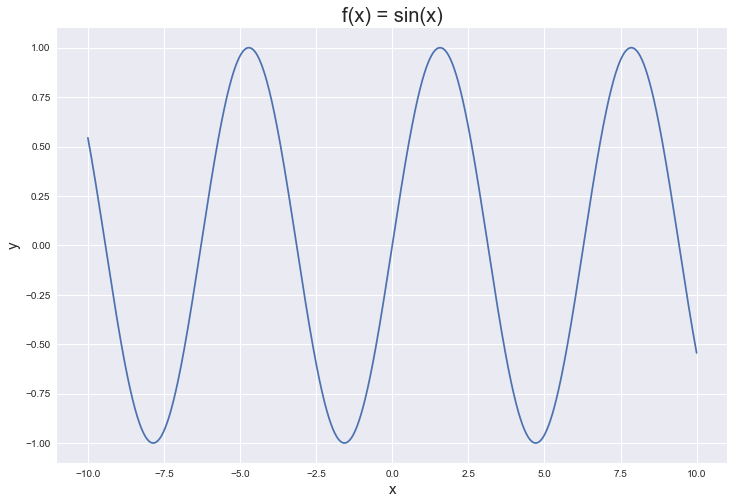

In [276]:
x = np.linspace(-10, 10, 1000)
y = np.sin(x)

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(x, y)
plt.title("f(x) = sin(x)", fontsize = 20)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.show()

In [277]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [278]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Slicing numpy arrays

In [279]:
import numpy as np

In [280]:
cfs1 = [-200, 20, 50, 70, 100, 50]
cfs2 = [-150, 25, 60, 50, 50, 40]
cfs3 = [-250, 10, 25, 50, 125, 200]

In [281]:
cfs = np.array([cfs1, cfs2, cfs3])
cfs

array([[-200,   20,   50,   70,  100,   50],
       [-150,   25,   60,   50,   50,   40],
       [-250,   10,   25,   50,  125,  200]])

In [282]:
cfs.shape

(3, 6)

In [283]:
# Get first element (first column) of each array (each row):
cfs[:, 0]

array([-200, -150, -250])

In [284]:
# Get last column of all rows:
cfs[:, -1]

array([ 50,  40, 200])

In [285]:
# How about the first 2 columns of each row?
cfs[:, : 2]

array([[-200,   20],
       [-150,   25],
       [-250,   10]])

In [286]:
# From first and last row (i.e. project 1 and project 3) get their first elements:
cfs[[0, 1], 0]

array([-200, -150])

In [287]:
# And now select specific indexes from the first row:
cfs[0, [0, 2, -1]]

array([-200,   50,   50])

In [288]:
# We can deduct 10 from the first column i.e. from first element of each row - Not this is in place:
cfs[:, 0] = cfs[:, 0] - 10
cfs

array([[-210,   20,   50,   70,  100,   50],
       [-160,   25,   60,   50,   50,   40],
       [-260,   10,   25,   50,  125,  200]])

# Introduction to Tabular Data - Pandas

Learning about DataFrames.

![DataFrame](../docs/images/dataframe.png)

Optimally we should only have `one` datatype per column.

Take a look at Jupyter notebook [Pandas Basics](../course/appendix/Appendix3_Materials/Video_Lectures_NBs/NB_03_Pandas_Basics.ipynb).

Some examples from that notebook:

In [289]:
import pandas as pd

In [290]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

In [291]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [292]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [293]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
886,0,2,male,27.0,0,0,13.00,S,NaN
887,1,1,female,19.0,0,0,30.00,S,B
888,0,3,female,NaN,1,2,23.45,S,NaN
889,1,1,male,26.0,0,0,30.00,C,C
890,0,3,male,32.0,0,0,7.75,Q,NaN


In [294]:
titanic.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
881,0,3,male,33.0,0,0,7.8958,S,NaN
882,0,3,female,22.0,0,0,10.5167,S,NaN
883,0,2,male,28.0,0,0,10.5000,S,NaN
884,0,3,male,25.0,0,0,7.0500,S,NaN
885,0,3,female,39.0,0,5,29.1250,Q,NaN
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C
890,0,3,male,32.0,0,0,7.7500,Q,NaN


In [295]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [296]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [297]:
titanic.describe(include = "O")

,sex,embarked,deck
count,891,889,203
unique,2,3,7
top,male,S,C
freq,577,644,59


Selecting columns:

In [298]:
titanic["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [299]:
type(titanic["age"])

pandas.core.series.Series

To select 2 (or more) columns we pass in a list of String (field names):

In [300]:
titanic[["age", "sex"]]

,age,sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


Whereas 1 column is a pandas Series, multiple columns is the usual DataFrame (so Series is a special case for 1 column):

In [301]:
type(titanic[["age", "sex"]])

pandas.core.frame.DataFrame

However, if we select only 1 column but provide it as a list, then we have a DataFrame:

In [302]:
type(titanic[["age"]])

pandas.core.frame.DataFrame

Alternate syntax to selecting columns:

In [303]:
titanic.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [304]:
# Let's look at another dataset:
import pandas as pd

summer = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/summer.csv")
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [305]:
# Do the above again but provide an index:
summer2 = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/summer.csv", index_col = "Athlete")
summer2

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HAJOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"DRIVAS, Dimitrios",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"CHASAPIS, Spiridon",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...
"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver


Position based indexing:

In [306]:
# The following gives us the first row from above:
summer.iloc[0]

Year                    1896
City                  Athens
Sport               Aquatics
Discipline          Swimming
Athlete        HAJOS, Alfred
Country                  HUN
Gender                   Men
Event         100M Freestyle
Medal                   Gold
Name: 0, dtype: object

In [307]:
# Last row
summer2.iloc[-1]

Year                         2012
City                       London
Sport                   Wrestling
Discipline    Wrestling Freestyle
Country                       SWE
Gender                        Men
Event                    Wg 96 KG
Medal                      Bronze
Name: LIDBERG, Jimmy, dtype: object

In [308]:
# Range of rows e.g. 2nd, 3rd and 4th:
summer.iloc[[1, 2, 3]]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold


In [309]:
# But it's usually better to slice:
summer.iloc[1 : 4]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold


In [310]:
# First 5 rows (with slicing):
summer.iloc[: 5]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [311]:
# Last 5 rows:
summer.iloc[-5 :]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [312]:
# Use head to get first 10 rows:
summer.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [313]:
# Get column within row:
summer.iloc[0, 4]

'HAJOS, Alfred'

In [314]:
# First 3 columns of first row:
summer.iloc[0, : 3]

Year         1896
City       Athens
Sport    Aquatics
Name: 0, dtype: object

In [315]:
# Certain columns from several rows:
summer.iloc[34 : 39, [0, 2, 4]]

,Year,Sport,Athlete
34,1896,Athletics,"GARRETT, Robert"
35,1896,Athletics,"KELLNER, Gyula"
36,1896,Athletics,"LOUIS, Spyridon"
37,1896,Athletics,"VASILAKOS, Kharilaos"
38,1896,Athletics,"DAMASKOS, Evangelos"


In [316]:
# Don't forget we can use dot notation e.g.
summer.iloc[:, 4].equals(summer.Athlete)

True

Without knowing an index we use label based indexing e.g. get athelete by name (instead of by integer index).

In [317]:
summer2.loc["DRIVAS, Dimitrios"] # NOTE we use the DataFrame which has been indexed by a particular column (Athelete)

Year                                1896
City                              Athens
Sport                           Aquatics
Discipline                      Swimming
Country                              GRE
Gender                               Men
Event         100M Freestyle For Sailors
Medal                             Bronze
Name: DRIVAS, Dimitrios, dtype: object

In [318]:
summer2.loc["PHELPS, Michael", ["Year", "City", "Medal"]]

,Year,City,Medal
Athlete,,,
"PHELPS, Michael",2004,Athens,Gold
"PHELPS, Michael",2004,Athens,Gold
"PHELPS, Michael",2004,Athens,Bronze
"PHELPS, Michael",2004,Athens,Gold
"PHELPS, Michael",2004,Athens,Gold
"PHELPS, Michael",2004,Athens,Bronze
"PHELPS, Michael",2004,Athens,Gold
"PHELPS, Michael",2004,Athens,Gold
"PHELPS, Michael",2008,Beijing,Gold


# Pandas Series

The 3 major data types in Pandas are:
- DataFrame
- Series (typically we get a Series upon selecting 1 row or 1 column of a DataFrame)
- Index

In [319]:
import pandas as pd

In [320]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

In [321]:
type(titanic.age)

pandas.core.series.Series

In [322]:
titanic.age.dtype

dtype('float64')

In [323]:
len(titanic.age)

891

In [324]:
titanic.age.index

RangeIndex(start=0, stop=891, step=1)

In [325]:
# Not all DataFrame methods are available on Series e.g. `info`, but we can convert in order to call:
titanic.age.to_frame()

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [326]:
titanic.age.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [327]:
titanic.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [328]:
from tabulate import tabulate

tabulate(
  [
    ["Excluding missing / NaN", titanic.age.count()],
    ["All included", titanic.age.size]
  ],
  tablefmt = "html"
)

Excluding missing / NaN,714
All included,891


In [329]:
from tabulate import tabulate

# Because Pandas can handle missing data such as NaN, the likes of `sum` will give a value, whereas standard `sum`can result in NaN
tabulate(
  [
    ["Pandas Sum", titanic.age.sum()],
    ["Standard Sum", sum(titanic.age)]
  ],
  tablefmt = "html"
)

Pandas Sum,21205.2
Standard Sum,nan


In [330]:
# Get counts of the `ages` where the counts of each age by default is sorted descending:
titanic.age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

# Non-numerical series

In [331]:
import pandas as pd

In [332]:
summer = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/summer.csv")

In [333]:
summer.Athlete

0                    HAJOS, Alfred
1                 HERSCHMANN, Otto
2                DRIVAS, Dimitrios
3               MALOKINIS, Ioannis
4               CHASAPIS, Spiridon
                   ...            
31160           JANIKOWSKI, Damian
31161    REZAEI, Ghasem Gholamreza
31162               TOTROV, Rustam
31163            ALEKSANYAN, Artur
31164               LIDBERG, Jimmy
Name: Athlete, Length: 31165, dtype: object

In [334]:
summer.Athlete.describe()

count               31165
unique              22762
top       PHELPS, Michael
freq                   22
Name: Athlete, dtype: object

In [335]:
summer.Athlete.value_counts()

PHELPS, Michael          22
LATYNINA, Larisa         18
ANDRIANOV, Nikolay       15
ONO, Takashi             13
MANGIAROTTI, Edoardo     13
                         ..
ZAKA, Uddin               1
ZAFAR, Hayat              1
MUHAMMAD, Rashid          1
MANNA, Muhammad Afzal     1
LIDBERG, Jimmy            1
Name: Athlete, Length: 22762, dtype: int64

# Copy !WATCH OUT!

In [336]:
import pandas as pd

In [337]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

In [338]:
age = titanic.age
age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [339]:
age.iloc[2] = 29

/var/folders/mg/b2drd58d7_d3dn_01lsl2vk80000gn/T/ipykernel_71991/4025304454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age.iloc[2] = 29


In [340]:
# The above gives an alert message as we have overwritten data:
age.head()

0    22.0
1    38.0
2    29.0
3    35.0
4    35.0
Name: age, dtype: float64

In [341]:
# use copy:
age = titanic.age.copy()
age.iloc[2] = 999
age.head()

0     22.0
1     38.0
2    999.0
3     35.0
4     35.0
Name: age, dtype: float64

In [342]:
# but this time our DataFrame stays intact (albeit it has the change of age from 26 to 29):
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,29.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


# Sorting and introduction to the inplace-parameter

Let's say we have a `dictionary` of sales per day where Monday is 1, Tuesday is 2 etc.

In [343]:
import pandas as pd

In [344]:
dic = { 1: 10, 3: 25, 2: 6, 4: 36, 5: 2, 6: 0, 7: None }

In [345]:
sales = pd.Series(dic)
sales

1    10.0
3    25.0
2     6.0
4    36.0
5     2.0
6     0.0
7     NaN
dtype: float64

In [346]:
sales.sort_index()

1    10.0
2     6.0
3    25.0
4    36.0
5     2.0
6     0.0
7     NaN
dtype: float64

In [347]:
sales.sort_values()

6     0.0
5     2.0
2     6.0
1    10.0
3    25.0
4    36.0
7     NaN
dtype: float64

In [348]:
sales.sort_values(ascending = False, na_position = "last", inplace = False) # inplace set to False by default, which is what we want
# If we (stupidly) set inplace to True, the above instruction would indeed by an instruction (and not an expression)
# and we would see no output (in the console) since `sales` would be mutated.
# However, here we correctly see output (below) as a copy is generated and returned (for display).

4    36.0
3    25.0
1    10.0
2     6.0
5     2.0
6     0.0
7     NaN
dtype: float64

__WARNING__ inplace set to True will change the current Series, i.e. this follows the nasty concept of `mutable` programming.

# Pandas index objects

In [349]:
import pandas as pd

In [350]:
summer = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/summer.csv")

In [351]:
summer.index

RangeIndex(start=0, stop=31165, step=1)

In [352]:
summer.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [353]:
type(summer.columns)

pandas.core.indexes.base.Index

In [354]:
summer.axes # Gives us 2 indexes, one for rows and other for columns

[RangeIndex(start=0, stop=31165, step=1),
 Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
        'Event', 'Medal'],
       dtype='object')]

In [355]:
summer.columns[: 3]

Index(['Year', 'City', 'Sport'], dtype='object')

In [356]:
summer.columns.to_list()

['Year',
 'City',
 'Sport',
 'Discipline',
 'Athlete',
 'Country',
 'Gender',
 'Event',
 'Medal']

# Changing row index labels

In [357]:
import pandas as pd

In [358]:
summer = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/summer.csv")

In [359]:
summer.index

RangeIndex(start=0, stop=31165, step=1)

In [360]:
# Load with different index:
summer = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/summer.csv", index_col = "Athlete")
summer.head(5)

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HAJOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"DRIVAS, Dimitrios",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"CHASAPIS, Spiridon",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver


In [361]:
# and then rest index back to original/default of built-in numerical index
# NOTING that `inplace` again default to False, so we don't reset the index on the current `summer` as we get a copy:
summer.reset_index()

,Athlete,Year,City,Sport,Discipline,Country,Gender,Event,Medal
0,"HAJOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
1,"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
2,"DRIVAS, Dimitrios",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
3,"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
4,"CHASAPIS, Spiridon",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
31161,"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
31162,"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver
31163,"ALEKSANYAN, Artur",2012,London,Wrestling,Wrestling Freestyle,ARM,Men,Wg 96 KG,Bronze


In [362]:
# Double check the index was not rest i.e. immutability saves the day:
summer.head(5)

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HAJOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"DRIVAS, Dimitrios",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"CHASAPIS, Spiridon",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver


If we made a mistake loading the data with an incorrect index, we can set the index (luckily inplace is again False by default):

In [363]:
summer.set_index("Year")

,City,Sport,Discipline,Country,Gender,Event,Medal
Year,,,,,,,
1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...
2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver


# Labels

In [364]:
import pandas as pd

In [365]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

In [366]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

In [367]:
titanic.columns[0]

'survived'

In [368]:
summer = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/summer.csv", index_col = "Athlete")

In [369]:
summer.head(5)

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HAJOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"DRIVAS, Dimitrios",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"CHASAPIS, Spiridon",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver


In [370]:
# Let's change spelling of first entry where thankfully `inplace` is False by default:
summer.rename(mapper = { "HAJOS, Alfred": "HAYOS, Alfred" }, axis = "index")

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HAYOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"DRIVAS, Dimitrios",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"CHASAPIS, Spiridon",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...
"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver


In [371]:
# OR
summer.rename(index = { "HAJOS, Alfred": "HAYOS, Alfred" })

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HAYOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"DRIVAS, Dimitrios",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"CHASAPIS, Spiridon",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...
"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver


In [372]:
# And let's also rename some columns (again getting back a copy, keeping inline with our desired immutability):
summer.rename(mapper = { "Sex": "Gender", "City": "Host City" }, axis = "columns")

,Year,Host City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HAJOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"DRIVAS, Dimitrios",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"CHASAPIS, Spiridon",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...
"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver


In [373]:
# Or
summer.rename(columns = { "Sex": "Gender", "City": "Host City" })

,Year,Host City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HAJOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"DRIVAS, Dimitrios",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"CHASAPIS, Spiridon",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...
"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver


# Filtering

In [374]:
import pandas as pd

In [375]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

Filter out all rows that are "male":

In [376]:
titanic[titanic.sex == "male"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,NaN
884,0,3,male,25.0,0,0,7.0500,S,NaN
886,0,2,male,27.0,0,0,13.0000,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [377]:
# Use "loc" instead for any extra information such as filter but only show the "fare" column:
titanic.loc[titanic.sex == "male", "fare"]

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
883    10.5000
884     7.0500
886    13.0000
889    30.0000
890     7.7500
Name: fare, Length: 577, dtype: float64

In [378]:
# However, we can still do this the first way (BUT this would filter twice):
titanic[titanic.sex == "male"]["fare"]

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
883    10.5000
884     7.0500
886    13.0000
889    30.0000
890     7.7500
Name: fare, Length: 577, dtype: float64

Women and children first upon evacuating the Titanic, so filter for males over 16 years old:

In [379]:
mask1 = titanic.sex == "male"
mask2 = titanic.age >= 16

adultMale = titanic.loc[mask1 & mask2, ["survived", "pclass", "sex", "age"]]
adultMale

,survived,pclass,sex,age
0,0,3,male,22.0
4,0,3,male,35.0
6,0,1,male,54.0
12,0,3,male,20.0
13,0,3,male,39.0
...,...,...,...,...
883,0,2,male,28.0
884,0,3,male,25.0
886,0,2,male,27.0
889,1,1,male,26.0


and let's check for either female or child:

In [380]:
mask1 = titanic.sex == "female"
mask2 = titanic.age < 16

womenOrChildren = titanic.loc[mask1 | mask2, ["survived", "pclass", "sex", "age"]]
womenOrChildren

,survived,pclass,sex,age
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
7,0,3,male,2.0
8,1,3,female,27.0
...,...,...,...,...
880,1,2,female,25.0
882,0,3,female,22.0
885,0,3,female,39.0
887,1,1,female,19.0


In [381]:
seoul1988 = summer.loc[summer.Year == 1988]
seoul1988.head(5)

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"MENA CAMPOS, Jesus",1988,Seoul,Aquatics,Diving,MEX,Men,10M Platform,Bronze
"LOUGANIS, Gregory",1988,Seoul,Aquatics,Diving,USA,Men,10M Platform,Gold
"XIONG, Ni",1988,Seoul,Aquatics,Diving,CHN,Men,10M Platform,Silver
"WYLAND-WILLIAMS, Wendy Lian",1988,Seoul,Aquatics,Diving,USA,Women,10M Platform,Bronze
"XU, Yan-Mei",1988,Seoul,Aquatics,Diving,CHN,Women,10M Platform,Gold


In [382]:
allMedalsSince1992 = summer.loc[summer.Year >= 1992]
allMedalsSince1992

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"XIONG, Ni",1992,Barcelona,Aquatics,Diving,CHN,Men,10M Platform,Bronze
"SUN, Shuwei",1992,Barcelona,Aquatics,Diving,CHN,Men,10M Platform,Gold
"DONIE, Scott R.",1992,Barcelona,Aquatics,Diving,USA,Men,10M Platform,Silver
"CLARK, Mary Ellen",1992,Barcelona,Aquatics,Diving,USA,Women,10M Platform,Bronze
"FU, Mingxia",1992,Barcelona,Aquatics,Diving,CHN,Women,10M Platform,Gold
...,...,...,...,...,...,...,...,...
"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver


In [383]:
medalsIn60s = summer.loc[summer.Year.between(1960, 1969, inclusive = "both")]
medalsIn60s

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"PHELPS, Brian Eric",1960,Rome,Aquatics,Diving,GBR,Men,10M Platform,Bronze
"WEBSTER, Robert David",1960,Rome,Aquatics,Diving,USA,Men,10M Platform,Gold
"TOBIAN, Gary Milburn",1960,Rome,Aquatics,Diving,USA,Men,10M Platform,Silver
"KRUTOVA, Ninel",1960,Rome,Aquatics,Diving,URS,Women,10M Platform,Bronze
"KRÄMER-ENGEL-GULBIN, Ingrid",1960,Rome,Aquatics,Diving,EUA,Women,10M Platform,Gold
...,...,...,...,...,...,...,...,...
"METZ, Lothar",1968,Mexico,Wrestling,Wrestling Gre-R,GDR,Men,78 - 87KG (Middleweight),Gold
"OLEINIK, Valentin",1968,Mexico,Wrestling,Wrestling Gre-R,URS,Men,78 - 87KG (Middleweight),Silver
"MARTINESCU, Nicolae",1968,Mexico,Wrestling,Wrestling Gre-R,ROU,Men,87 - 97KG (Light-Heavyweight),Bronze


In [384]:
myFavouriteGames = [1972, 1996]

medals72and96 = summer.loc[summer.Year.isin(myFavouriteGames)]
medals72and96

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"CAGNOTTO, Giorgio Franco",1972,Munich,Aquatics,Diving,ITA,Men,10M Platform,Bronze
"DIBIASI, Klaus",1972,Munich,Aquatics,Diving,ITA,Men,10M Platform,Gold
"RYDZE, Richard Anthony",1972,Munich,Aquatics,Diving,USA,Men,10M Platform,Silver
"JANICKE, Marina",1972,Munich,Aquatics,Diving,GDR,Women,10M Platform,Bronze
"KNAPE-LINDBERGH, Ulrika",1972,Munich,Aquatics,Diving,SWE,Women,10M Platform,Gold
...,...,...,...,...,...,...,...,...
"OLEYNYK, Vyacheslav",1996,Atlanta,Wrestling,Wrestling Gre-R,UKR,Men,82 - 90KG (Light-Heavyweight),Gold
"FAFINSKI, Jacek",1996,Atlanta,Wrestling,Wrestling Gre-R,POL,Men,82 - 90KG (Light-Heavyweight),Silver
"LJUNGBERG, Mikael",1996,Atlanta,Wrestling,Wrestling Gre-R,SWE,Men,90 - 100KG (Heavyweight),Bronze


In [385]:
notMedals72and96 = summer.loc[~summer.Year.isin(myFavouriteGames)]
notMedals72and96

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HAJOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"DRIVAS, Dimitrios",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"CHASAPIS, Spiridon",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...
"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver


# NA values / missing values

In [386]:
import pandas as pd

In [387]:
sales = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/sales.csv", index_col = 0)

In [388]:
sales.loc["Steven", "Thu"]

nan

So how do we handle NA values / missing values?

In [389]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

In [390]:
titanic.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [391]:
titanic.loc[titanic.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
61,1,1,female,38.0,0,0,80.0,NaN,B
829,1,1,female,62.0,0,0,80.0,NaN,B


In [392]:
# We could drop rows that have at least 1 missing value:
titanic.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,D
872,0,1,male,33.0,0,0,5.0000,S,B
879,1,1,female,56.0,0,1,83.1583,C,C
887,1,1,female,19.0,0,0,30.0000,S,B


In [393]:
# We could drop columns that have at least 1 missing value (change the axis from the default):
titanic.dropna(axis = 1)

,survived,pclass,sex,sibsp,parch,fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000
887,1,1,female,0,0,30.0000
888,0,3,female,1,2,23.4500
889,1,1,male,0,0,30.0000


In [394]:
# We could fill in missing data with some default or approximation e.g.
titanicCopy = titanic.copy(deep = True)
titanicCopy.age.fillna(value = 0, inplace = True)
titanicCopy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,0.0,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


# Exporting DataFrames

At some point we will want to save our work e.g. before closing a Jupyter notebook, export a DataFrame to a CSV file.

In [395]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")
titanicWithoutNAs = titanic.dropna()
titanicWithoutNAs

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,D
872,0,1,male,33.0,0,0,5.0000,S,B
879,1,1,female,56.0,0,1,83.1583,C,C
887,1,1,female,19.0,0,0,30.0000,S,B


In [396]:
titanicWithoutNAs.to_csv("titanic-without-na.csv", index = False)

# Statistics and Accumulations

In [397]:
import pandas as pd

In [398]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

In [399]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualisation with Matplotlib

In [400]:
import pandas as pd

In [401]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

In [402]:
import matplotlib.pyplot as plt

<AxesSubplot:>

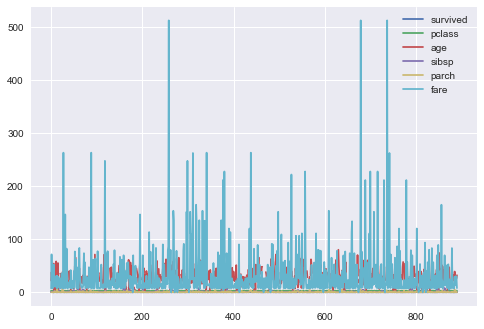

In [403]:
titanic.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

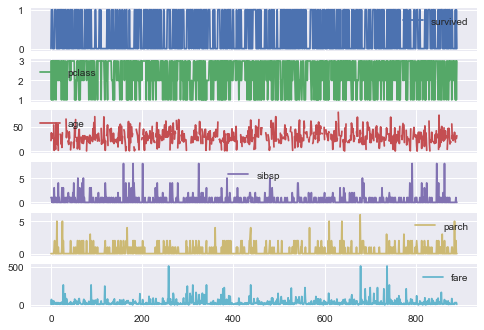

In [404]:
titanic.plot(subplots = True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

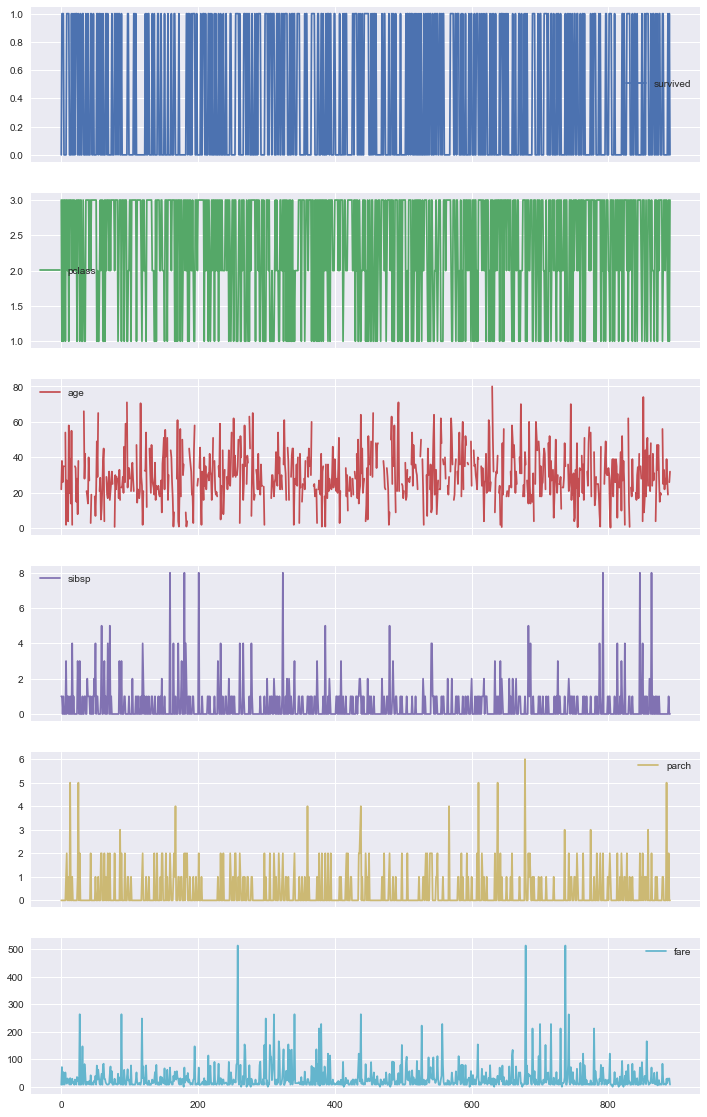

In [405]:
titanic.plot(subplots = True, figsize = (12, 20))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

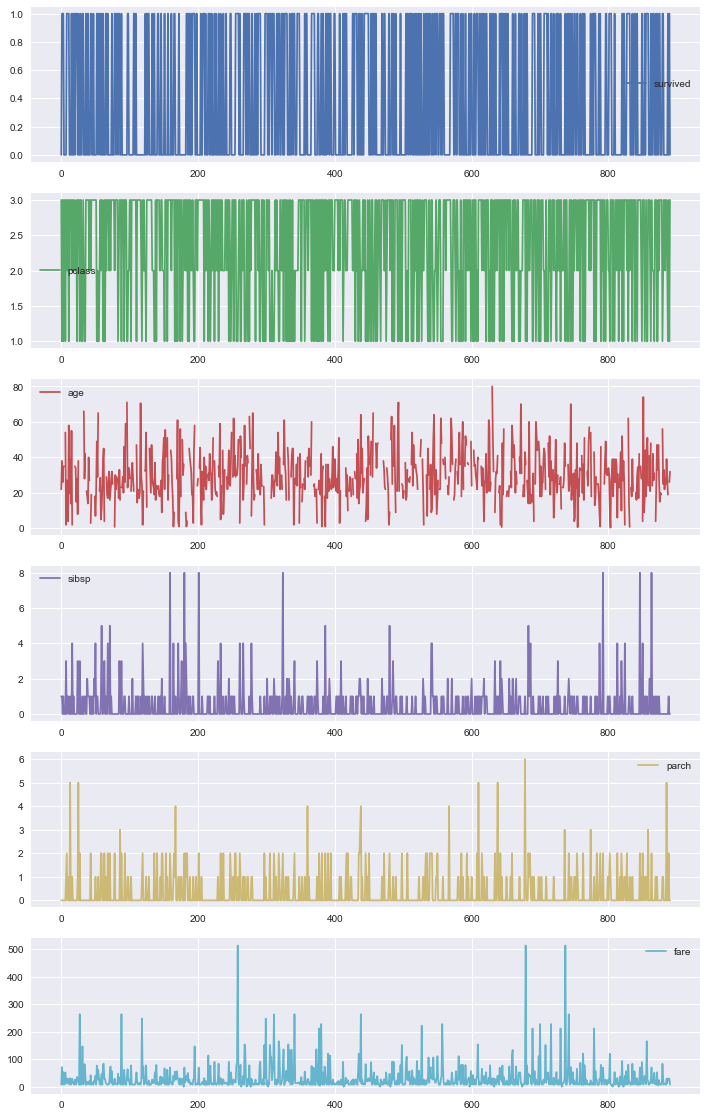

In [406]:
titanic.plot(subplots = True, figsize = (12, 20), sharex = False)

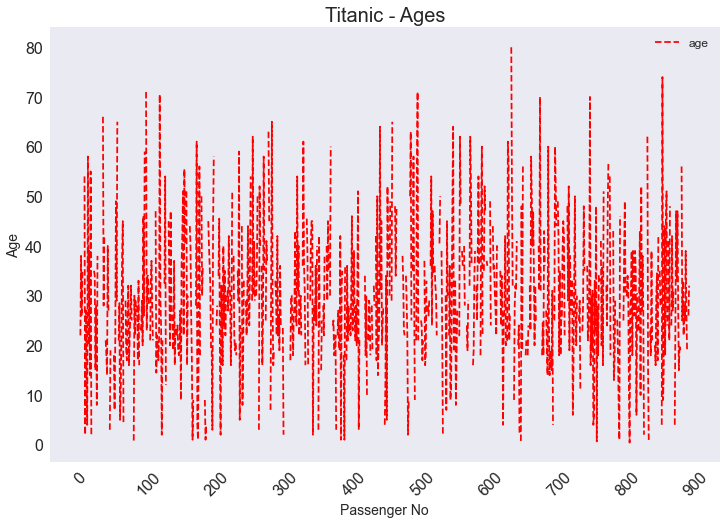

In [407]:
xticks = [x for x in range(0, 901, 100)]

titanic.age.plot(figsize = (12, 8), fontsize = 16, c = "red", linestyle = "--", xticks = xticks, rot = 45)
plt.title("Titanic - Ages", fontsize = 20)
plt.legend(loc = "best", fontsize = 12)
plt.xlabel("Passenger No", fontsize = 14)
plt.ylabel("Age", fontsize = 14)
plt.grid()

In [408]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Histograms

In [409]:
import pandas as pd
import matplotlib.pyplot as plt

In [410]:
plt.style.use("seaborn")

In [411]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

<AxesSubplot:ylabel='Frequency'>

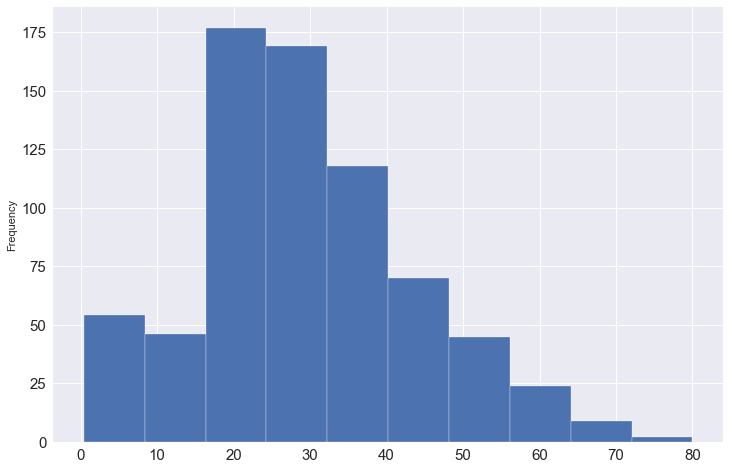

In [412]:
titanic.age.plot(kind = "hist", figsize = (12, 8), fontsize = 15)

<AxesSubplot:>

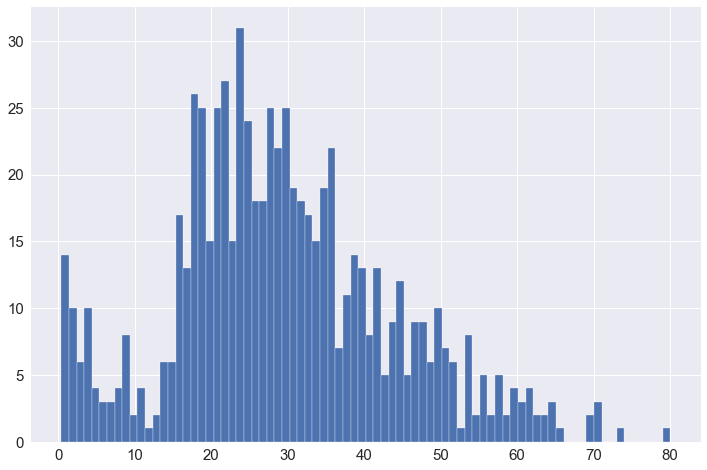

In [413]:
titanic.age.hist(figsize = (12, 8), bins = 80, xlabelsize = 15, ylabelsize = 15)

# Scatterplot

In [414]:
import pandas as pd
import matplotlib.pyplot as plt

In [415]:
plt.style.use("seaborn")

In [416]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

<AxesSubplot:xlabel='age', ylabel='fare'>

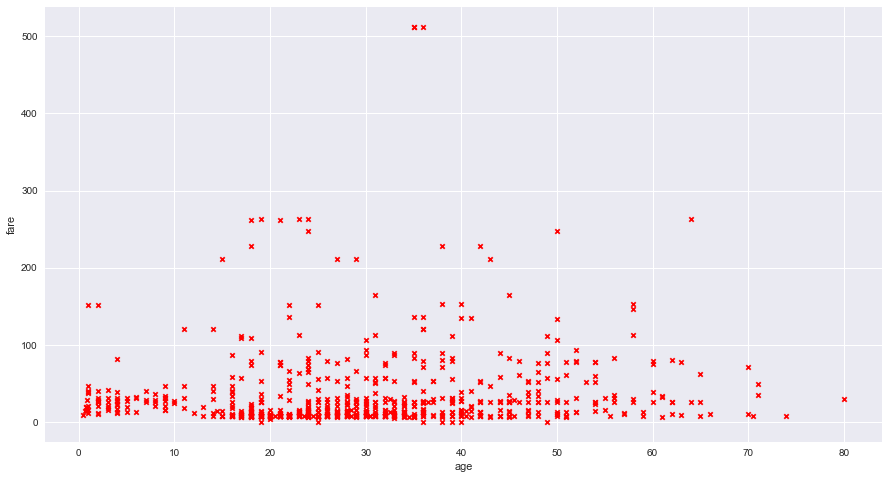

In [417]:
# Is there any correlation between being older and potentially having more money i.e. able to afford a higher fare?
titanic.plot(kind = "scatter", figsize = (15, 8), x = "age", y = "fare", c = "red", marker = "x")

# Seaborn

In [418]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [419]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

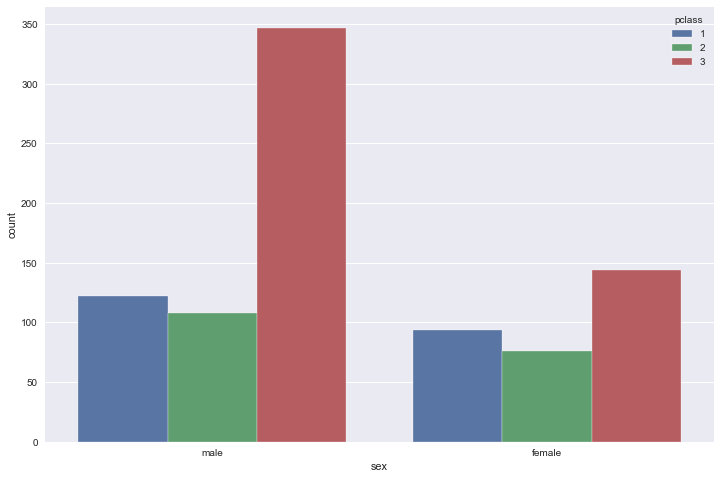

In [420]:
plt.figure(figsize = (12, 8))
sns.countplot(data = titanic, x = "sex", hue = "pclass")
plt.show()

# Removing columns

In [421]:
import pandas as pd

In [422]:
summer = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/summer.csv")

In [423]:
summer.drop(columns = ["Sport", "Discipline"])

,Year,City,Athlete,Country,Gender,Event,Medal
0,1896,Athens,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...
31160,2012,London,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


We can pick which columns we want (effectively dropping all others not specified).
Use `loc` we can select all rows (with `:`) and the columns we want:

In [424]:
summer.loc[:, ["Year", "City", "Athlete", "Country"]]

,Year,City,Athlete,Country
0,1896,Athens,"HAJOS, Alfred",HUN
1,1896,Athens,"HERSCHMANN, Otto",AUT
2,1896,Athens,"DRIVAS, Dimitrios",GRE
3,1896,Athens,"MALOKINIS, Ioannis",GRE
4,1896,Athens,"CHASAPIS, Spiridon",GRE
...,...,...,...,...
31160,2012,London,"JANIKOWSKI, Damian",POL
31161,2012,London,"REZAEI, Ghasem Gholamreza",IRI
31162,2012,London,"TOTROV, Rustam",RUS
31163,2012,London,"ALEKSANYAN, Artur",ARM


# GroupBy

![Group by](../docs/images/group-by.jpg)

In [425]:
import pandas as pd

In [426]:
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

In [427]:
titanicSexAndAgeOfFirst10Rows = titanic.iloc[: 10, [2, 3]]

In [428]:
titanicSexAndAgeOfFirst10Rows

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [429]:
gbo = titanicSexAndAgeOfFirst10Rows.groupby("sex")

In [430]:
type(gbo)

pandas.core.groupby.generic.DataFrameGroupBy

In [431]:
gbo.groups

{'female': [1, 2, 3, 8, 9], 'male': [0, 4, 5, 6, 7]}

In [432]:
l = list(gbo)

In [433]:
l

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [434]:
len(l)

2

In [435]:
l[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [436]:
type(l[0])

tuple

In [437]:
l[0][0] # First element of the above tuple is the String "female"

'female'

In [439]:
l[0][1] # Second element of the above tuple is a DataFrame

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [440]:
type(l[0][1])

pandas.core.frame.DataFrame

In [441]:
# The above is a tad cryptic - Instead we can:
titanicSexAndAgeOfFirst10Rows.loc[titanicSexAndAgeOfFirst10Rows.sex == "female"]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [442]:
# We can also split by multiple keys
summer = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/summer.csv")

In [443]:
# How many unique countries (that have won an Olympic medal)?
summer.Country.nunique()

147

In [444]:
split1 = summer.groupby("Country")

In [448]:
l = list(split1)
l

[('AFG',
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 ('AHO',
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 ('ALG',
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  19874  1992    Barcelona  Athletics  Athletics    BOULMERKA, Hassiba     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine  

In [449]:
len(l)

147

In [450]:
l[100][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5031,1928,Amsterdam,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5741,1932,Los Angeles,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5889,1932,Los Angeles,Athletics,Athletics,"TORIBIO, Simeon Galvez",PHI,Men,High Jump,Bronze
5922,1932,Los Angeles,Boxing,Boxing,"VILLANUEVA, Jose",PHI,Men,50.8 - 54KG (Bantamweight),Bronze
6447,1936,Berlin,Athletics,Athletics,"WHITE, Miguel S.",PHI,Men,400M Hurdles,Bronze
11005,1964,Tokyo,Boxing,Boxing,"VILLANUEVA, Anthony N.",PHI,Men,54 - 57KG (Featherweight),Silver
18513,1988,Seoul,Boxing,Boxing,"SERANTES, Leopoldo",PHI,Men,- 48KG (Light-Flyweight),Bronze
20184,1992,Barcelona,Boxing,Boxing,"VELASCO, Roel",PHI,Men,- 48KG (Light-Flyweight),Bronze
21927,1996,Atlanta,Boxing,Boxing,"VELASCO, Mansueto",PHI,Men,- 48KG (Light-Flyweight),Silver


In [451]:
split2 = summer.groupby(by = ["Country", "Gender"])

In [452]:
l2 = list(split2)
l2

[(('AFG', 'Men'),
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 (('AHO', 'Men'),
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 (('ALG', 'Men'),
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine     ALG   
  21610  1996      Atlanta  Athletics  Athlet

In [453]:
len(l2)

236

In [454]:
l2[104]

(('IRL', 'Women'),
        Year     City      Sport Discipline                Athlete Country  \
 21356  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21369  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21375  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21381  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 23627  2000   Sydney  Athletics  Athletics      O'SULLIVAN, Sonia     IRL   
 29896  2012   London     Boxing     Boxing          TAYLOR, Katie     IRL   
 
       Gender                   Event   Medal  
 21356  Women          200M Butterfly  Bronze  
 21369  Women  200M Individual Medley    Gold  
 21375  Women          400M Freestyle    Gold  
 21381  Women  400M Individual Medley    Gold  
 23627  Women                   5000M  Silver  
 29896  Women                   60 KG    Gold  )

In [455]:
l2[104][0]

('IRL', 'Women')

In [456]:
l2[104][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21356,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Butterfly,Bronze
21369,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Individual Medley,Gold
21375,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Freestyle,Gold
21381,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Individual Medley,Gold
23627,2000,Sydney,Athletics,Athletics,"O'SULLIVAN, Sonia",IRL,Women,5000M,Silver
29896,2012,London,Boxing,Boxing,"TAYLOR, Katie",IRL,Women,60 KG,Gold


In [458]:
# Finally we split-apply-combine
titanic = pd.read_csv("../course/appendix/Appendix3_Materials/Video_Lectures_NBs/titanic.csv")

In [459]:
titanicSexAndAgeOfFirst10Rows = titanic.iloc[: 10, [2, 3]]
titanicSexAndAgeOfFirst10Rows

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [461]:
titanicSexAndAgeOfFirst10Rows.groupby("sex").mean()

,age
sex,
female,28.00
male,28.25


In [462]:
titanic.groupby("sex").sum()

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


In [463]:
titanic.groupby("sex").survived.sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [464]:
titanic.groupby("sex")[["fare", "age"]].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [465]:
means = titanic.groupby("sex").mean()
means

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [466]:
import matplotlib.pyplot as plt

In [467]:
plt.style.use("seaborn")

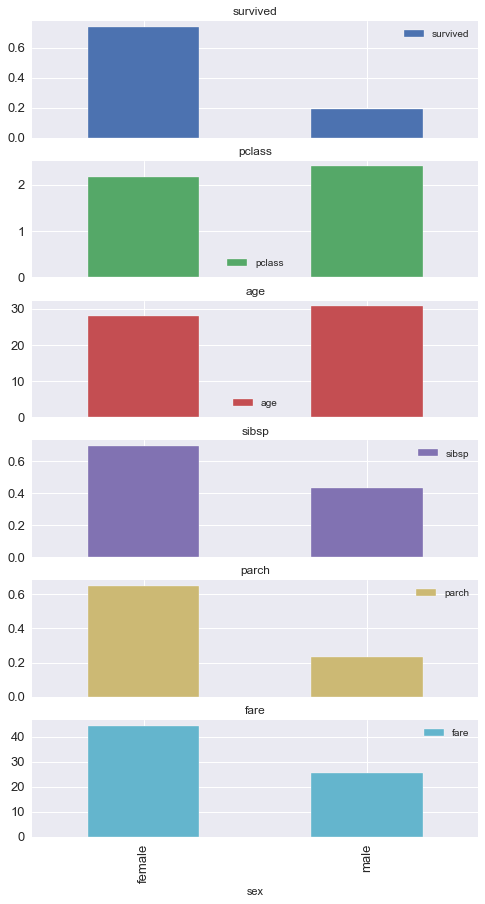

In [469]:
means.plot(kind = "bar", subplots = True, figsize = (8, 15), fontsize = 13)
plt.show()